## Content
The datasets consists of several medical predictor variables and one target variable, **Outcome**. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import dataset
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.info(), data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
 Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64)

<AxesSubplot:>

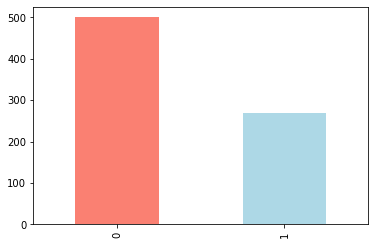

In [4]:
data.Outcome.value_counts().plot(kind="bar", color=['salmon','lightblue'])

## Age Distribution of the age column

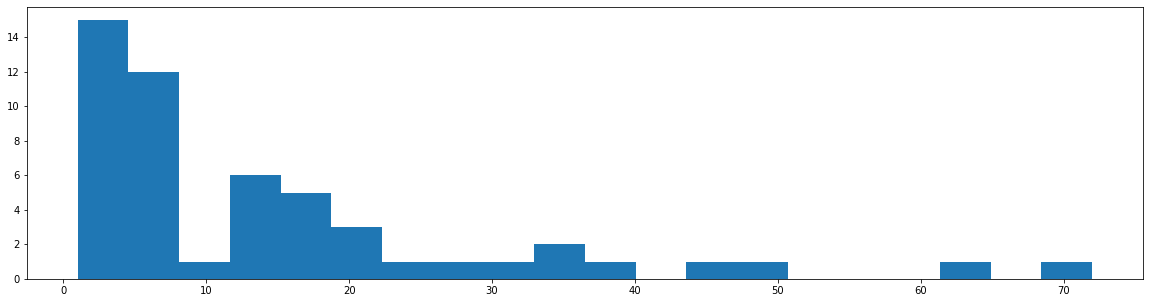

In [5]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.hist(data.Age.value_counts(), bins=20);

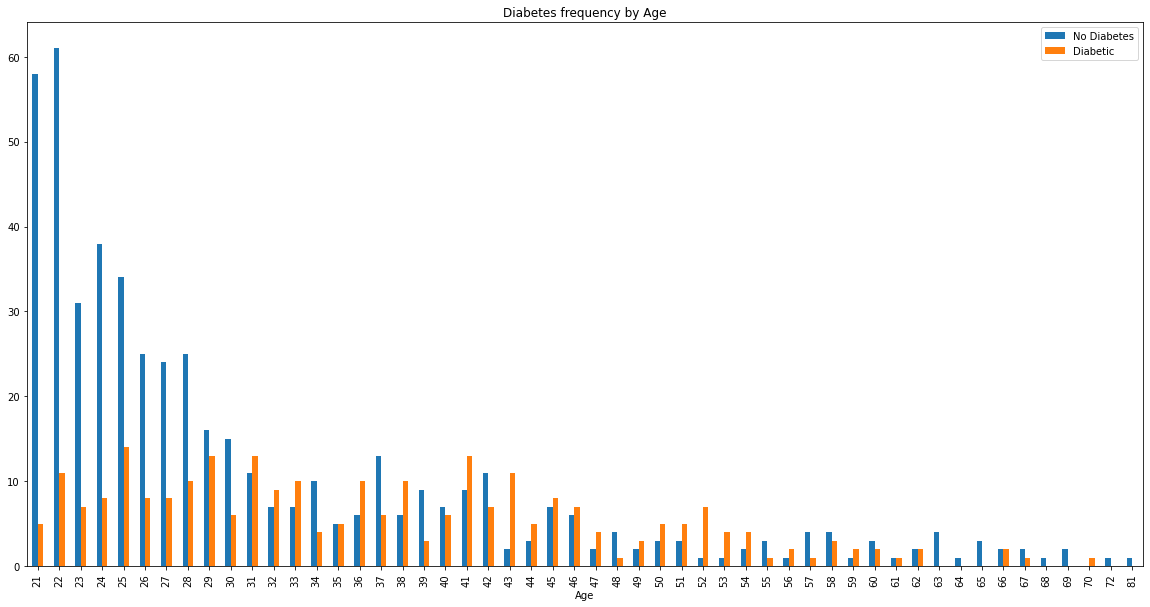

In [6]:
pd.crosstab(data.Age,data.Outcome).plot(kind="bar", figsize=(20,10));
plt.title('Diabetes frequency by Age');
plt.legend(['No Diabetes','Diabetic']);

In [7]:
# Make a correlation matrix
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


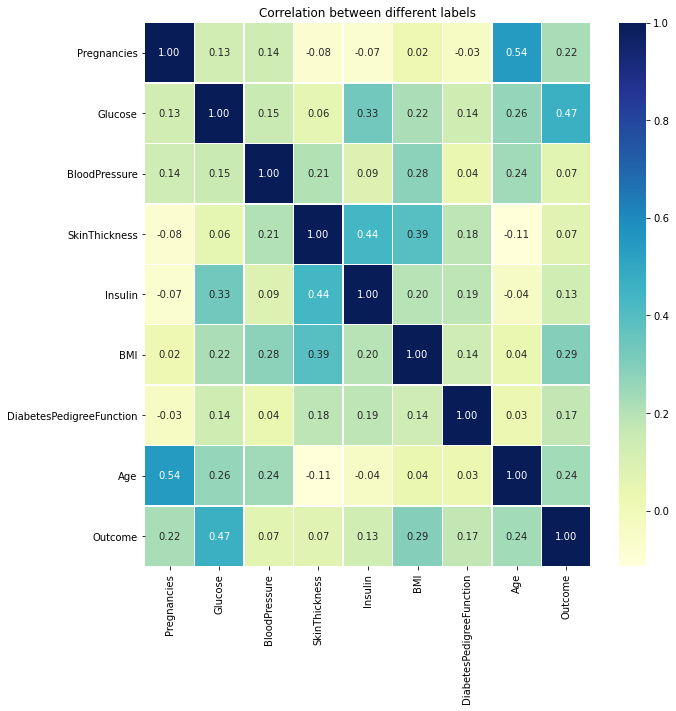

In [8]:
# Let' make our correlation more communicating
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");
ax.set(title='Correlation between different labels');

## Choosing a model

Try different Machine Learning models
* RandomForestClassifier
* LogisticRegression

In [9]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score


models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "LinearRegression": LinearRegression(),
    "LinearSVC": SVC(),
    "LogisticRegression": LogisticRegression(),
    "KNearestNeighbors": KNeighborsClassifier(),
}

In [10]:
# Evaluate model Precision, Recall, F1 scores
def eval_prediction(y_test, y_preds):
   return {"Accuracy": round(accuracy_score(y_test, y_preds),2),
           "Precision": round(precision_score(y_test, y_preds),2),
           "Recall": round(recall_score(y_test, y_preds),2),
           "F1": round(f1_score(y_test, y_preds),2)}

# Fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
        Evaluates different machine learning models.
        
        model: A dict of different sklearn models
        X_train: Training data (no label)
        X_test: Testing data (no labels)
        y_train: Training label
        y_test: Testing Label
    """
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = round(model.score(X_test, y_test)*100,2)
        
    return model_scores

In [11]:
# Split data into features and label
X = data.drop('Outcome', axis=1)
y = data['Outcome']


# Split data into train and test splits
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
model_scores = fit_and_score(models,X_train, X_test, y_train, y_test)
model_scores

C:\Users\AC Nice\Documents\DATA SCIENCE PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 75.32,
 'LinearRegression': 25.5,
 'LinearSVC': 76.62,
 'LogisticRegression': 74.68,
 'KNearestNeighbors': 66.23}

# Model Comparison

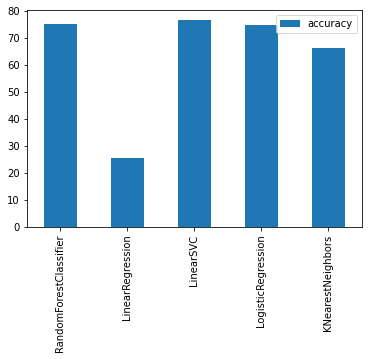

In [12]:
model_comparison = pd.DataFrame(model_scores, index=['accuracy'])
model_comparison.T.plot.bar();

**Note**: A models default accuracy is not always true, so we are going to evaluate it the more to increase accuracy

**What I'm going to look into:**
1. Hyperparameter Tuning
2. Feature Importance
3. Confusion matrix
4. Cross validation
5. Precision
6. Recall
7. F1 score
8. Classification Report
9. ROC curve
10. AUC curve

### Hyperparameter Tuning (By Hand)

In [13]:
# Tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Instatiate KNN
knn = KNeighborsClassifier()

# Loop through neigbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Update Training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update Test scores
    test_scores.append(knn.score(X_test,y_test))

# train_scores, test_scores

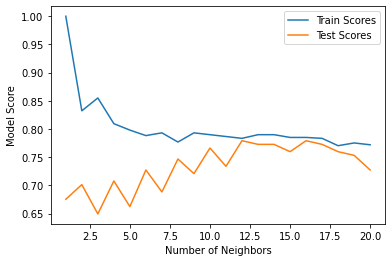

The maximum Test score is 77.92%


In [14]:
plt.plot(neighbors, train_scores, label="Train Scores");
plt.plot(neighbors, test_scores, label="Test Scores");
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
plt.show()
print(f"The maximum Test score is {max(test_scores)*100:.2f}%")

## Hyperparameter Tuning with RandomizedSearchCV

I'm going to tune:
* LogisticRegression 
* RandomForestClassifier

In [15]:
from sklearn.model_selection import RandomizedSearchCV

logistic_grid = {
    "C" : np.logspace(-4, 4, 50),
    "solver":['liblinear'],
}

# Create Hyperparameter grid for RandomforestClassifier
rs_grid ={
    "n_estimators": np.arange(10,500, 50),
    "max_depth": [None, 3,5,10],
    "min_samples_split": np.arange(2,40,2),
    "min_samples_leaf": np.arange(1,25,2)
}

# Now Let's tune LogisticRegression using RandomizedSearchCV
logistic_rs_model = RandomizedSearchCV(estimator=LogisticRegression(), 
                              param_distributions=logistic_grid, 
                              cv=5, verbose=2, n_iter=20)

# Fit model for Logistic Regression
logistic_rs_model.fit(X_train, y_train);
logistic_rs_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END ..............C=3.727593720314938, solver=liblinear; total time=   0.0s
[CV] END ..............C=3.727593720314938, solver=liblinear; total time=   0.0s
[CV] END ..............C=3.727593720314938, solver=liblinear; total time=   0.0s
[CV] END ..............C=3.727593720314938, solver=liblinear; total time=   0.0s
[CV] END ..............C=3.727593720314938, solver=liblinear; total time=   0.0s
[CV] END ...............C=3237.45754281764, solver=liblinear; total time=   0.0s
[CV] END ...............C=3237.45754281764, sol

{'solver': 'liblinear', 'C': 3.727593720314938}

In [16]:
logistic_rs_model.score(X_test, y_test)

0.7532467532467533

### Hyperparameter Tuning for RandomForestClassifier

In [17]:
rf_rs_model = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=rs_grid, 
                                 cv=5, n_iter=20, verbose=2)
# Fit the RandomForestClassifier
rf_rs_model.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=110; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=110; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=110; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=110; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=4, n_estimators=110; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=36, n_estimators=110; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=36, n_estimators=110; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=36, n_estimators=110; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=36, n_estimators=110; total time=   0.9s
[CV] END max_d

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=34, n_estimators=60; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=34, n_estimators=60; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=34, n_estimators=60; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=34, n_estimators=60; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=34, n_estimators=60; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=14, n_estimators=60; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=14, n_estimators=60; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=14, n_estimators=60; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=14, n_estimators=60; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=14, n_estimators=60; total tim

In [18]:
# Score the RandomForestClassifier
rf_rs_model.score(X_test, y_test)

0.7597402597402597

## Hyperparameter Tuning using the GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV

logistic_grid = {
    "C" : np.logspace(-4, 4, 50),
    "solver":['liblinear'],
}

# Create Hyperparameter grid for RandomforestClassifier
rs_grid ={
    "n_estimators": np.arange(10,200, 50),
    "max_depth": [None, 3,5,10],
    "min_samples_split": np.arange(2,10,2),
    "min_samples_leaf": np.arange(1,10,2)
}

logistic_gs_model = GridSearchCV(estimator=LogisticRegression(), param_grid=logistic_grid, cv=5,verbose=2)

# Fit the Logistic Regression Model
logistic_gs_model.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00021209508879201905, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00021209508879201905, sol

[CV] END .............C=0.2682695795279725, solver=liblinear; total time=   0.0s
[CV] END .............C=0.2682695795279725, solver=liblinear; total time=   0.0s
[CV] END .............C=0.2682695795279725, solver=liblinear; total time=   0.0s
[CV] END .............C=0.2682695795279725, solver=liblinear; total time=   0.0s
[CV] END .............C=0.2682695795279725, solver=liblinear; total time=   0.0s
[CV] END .............C=0.3906939937054613, solver=liblinear; total time=   0.0s
[CV] END .............C=0.3906939937054613, solver=liblinear; total time=   0.0s
[CV] END .............C=0.3906939937054613, solver=liblinear; total time=   0.0s
[CV] END .............C=0.3906939937054613, solver=liblinear; total time=   0.0s
[CV] END .............C=0.3906939937054613, solver=liblinear; total time=   0.0s
[CV] END .............C=0.5689866029018293, solver=liblinear; total time=   0.0s
[CV] END .............C=0.5689866029018293, solver=liblinear; total time=   0.0s
[CV] END .............C=0.56

[CV] END ..............C=494.1713361323828, solver=liblinear; total time=   0.0s
[CV] END ..............C=494.1713361323828, solver=liblinear; total time=   0.0s
[CV] END ..............C=719.6856730011514, solver=liblinear; total time=   0.0s
[CV] END ..............C=719.6856730011514, solver=liblinear; total time=   0.0s
[CV] END ..............C=719.6856730011514, solver=liblinear; total time=   0.0s
[CV] END ..............C=719.6856730011514, solver=liblinear; total time=   0.0s
[CV] END ..............C=719.6856730011514, solver=liblinear; total time=   0.0s
[CV] END .............C=1048.1131341546852, solver=liblinear; total time=   0.0s
[CV] END .............C=1048.1131341546852, solver=liblinear; total time=   0.0s
[CV] END .............C=1048.1131341546852, solver=liblinear; total time=   0.0s
[CV] END .............C=1048.1131341546852, solver=liblinear; total time=   0.0s
[CV] END .............C=1048.1131341546852, solver=liblinear; total time=   0.0s
[CV] END .............C=1526

In [20]:
logistic_gs_model.score(X_test,y_test)

0.7532467532467533

In [21]:
# Hyperparameter tuning using of RandomForestClassifier using GridSearchCV
rf_gs_model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rs_grid,cv=5, verbose=2)
rf_gs_model.fit(X_train, y_train);

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=110

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=110

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=110

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=110

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.7s
[CV] END 

[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=110; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=110; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=110; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=110; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=110; total time=   0.8s
[CV] 

[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=160; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=160; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=160; total time=   1.1s
[C

[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=160; total time=   1.3s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=160; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=160; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=160; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=160; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=10; total time=   0.0s
[

[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=160; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=160; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=160; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=160; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=160; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV]

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.4s
[CV] EN

[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=60; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=110; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=110; total time=   0.7s
[CV] END

[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=60; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=60; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=60; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=60; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=60; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=110; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=110; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=110; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=110; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=110; total time=   0.7s
[CV] 

[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=60; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=60; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=110; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=110; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=110; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=110; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=110; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=160; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=160; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=160; total time=   1.1s
[C

[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=110; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=110; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=110; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=110; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=160; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=160; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=160; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=160; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=160; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=110; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=110; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=160; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=160; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=160; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=160; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=160; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time= 

[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=160; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=160; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=160; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=160; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=160; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=10; total time=   

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=160; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=160; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=160; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=60; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=60; total time=   0.

[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=4, n_estimators=160; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=60; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=60; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=60; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=60; total time=   0.4s

[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=6, n_estimators=60; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=6, n_estimators=60; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=6, n_estimators=60; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=6, n_estimators=60; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=6, n_estimators=60; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.7s

In [22]:
rf_gs_model.score(X_test, y_test)

0.7532467532467533

## Evaluating Our Tuned model Beyond Accuracy
* ROC curve
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1 Score

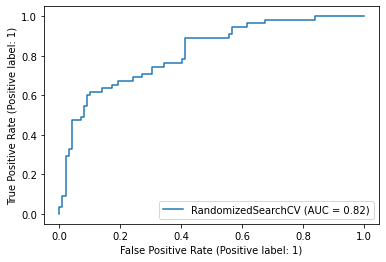

In [23]:
# Make Prediction with tuned model
logistic_preds = logistic_rs_model.predict(X_test)

from sklearn.metrics import plot_roc_curve
plot_roc_curve(logistic_rs_model,X_test, y_test)

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, logistic_preds)

array([[80, 19],
       [19, 36]], dtype=int64)

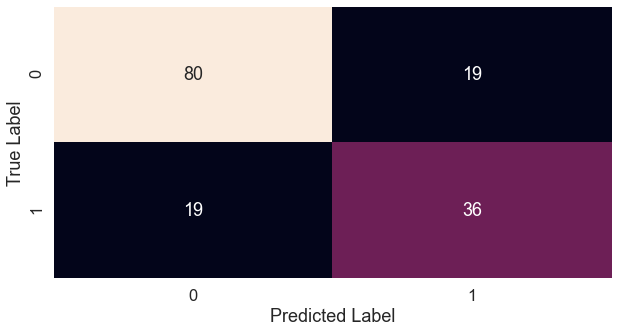

In [68]:
# Visualize confusion matrix using seaborn
sns.set(font_scale=1.5)
def plot_conf_matrix(y_test, y_preds):
    """
        Plots a confusion matrix using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(10,5))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds), annot=True, cbar = False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label");
    
plot_conf_matrix(y_test, logistic_preds)

In [30]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, logistic_preds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [40]:
# Cross validation score
def cross_val(model, scoring_param):
    """
        Returns cross validated score of a model according to the scoring parameter passed
        scoring_param: Cross validation scoring parameter
        model: working estimator
    """
    score = cross_val_score(model,X, y, cv=5, scoring=str(scoring_param))
#     try:
#     print(f"The {scoring_param} score is: {score*100:.2f}")
    return score
#     except NameError:
#         print ("Invalid scoring parameter passed")
#     except:
#         print ("Something went wrong")

## Precision, Recall, and F1 scores

In [43]:
log_acc = cross_val(logistic_gs_model, "accuracy")
log_pre = cross_val(logistic_gs_model, "precision")
log_f1 = cross_val(logistic_gs_model, "f1")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00021209508879201905, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00021209508879201905, sol

[CV] END ............C=0.18420699693267145, solver=liblinear; total time=   0.0s
[CV] END .............C=0.2682695795279725, solver=liblinear; total time=   0.0s
[CV] END .............C=0.2682695795279725, solver=liblinear; total time=   0.0s
[CV] END .............C=0.2682695795279725, solver=liblinear; total time=   0.0s
[CV] END .............C=0.2682695795279725, solver=liblinear; total time=   0.0s
[CV] END .............C=0.2682695795279725, solver=liblinear; total time=   0.0s
[CV] END .............C=0.3906939937054613, solver=liblinear; total time=   0.0s
[CV] END .............C=0.3906939937054613, solver=liblinear; total time=   0.0s
[CV] END .............C=0.3906939937054613, solver=liblinear; total time=   0.0s
[CV] END .............C=0.3906939937054613, solver=liblinear; total time=   0.0s
[CV] END .............C=0.3906939937054613, solver=liblinear; total time=   0.0s
[CV] END .............C=0.5689866029018293, solver=liblinear; total time=   0.0s
[CV] END .............C=0.56

[CV] END ..............C=494.1713361323828, solver=liblinear; total time=   0.0s
[CV] END ..............C=494.1713361323828, solver=liblinear; total time=   0.0s
[CV] END ..............C=494.1713361323828, solver=liblinear; total time=   0.0s
[CV] END ..............C=719.6856730011514, solver=liblinear; total time=   0.0s
[CV] END ..............C=719.6856730011514, solver=liblinear; total time=   0.0s
[CV] END ..............C=719.6856730011514, solver=liblinear; total time=   0.0s
[CV] END ..............C=719.6856730011514, solver=liblinear; total time=   0.0s
[CV] END ..............C=719.6856730011514, solver=liblinear; total time=   0.0s
[CV] END .............C=1048.1131341546852, solver=liblinear; total time=   0.0s
[CV] END .............C=1048.1131341546852, solver=liblinear; total time=   0.0s
[CV] END .............C=1048.1131341546852, solver=liblinear; total time=   0.0s
[CV] END .............C=1048.1131341546852, solver=liblinear; total time=   0.0s
[CV] END .............C=1048

[CV] END ...........C=0.009102981779915217, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.009102981779915217, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.009102981779915217, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.009102981779915217, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.013257113655901081, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.013257113655901081, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.013257113655901081, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.013257113655901081, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.013257113655901081, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.019306977288832496, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.019306977288832496, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.019306977288832496, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0193

[CV] END .............C=16.768329368110066, solver=liblinear; total time=   0.0s
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=35.564803062231285, solver=liblinear; total time=   0.0s
[CV] END .............C=35.564803062231285, solver=liblinear; total time=   0.0s
[CV] END .............C=35.564803062231285, solver=liblinear; total time=   0.0s
[CV] END .............C=35.564803062231285, solver=liblinear; total time=   0.0s
[CV] END .............C=35.564803062231285, solver=liblinear; total time=   0.0s
[CV] END ..............C=51.79474679231202, solver=liblinear; total time=   0.0s
[CV] END ..............C=51.

[CV] END .........C=0.00030888435964774815, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0004498432668969444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0004498432668969444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0004498432668969444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0004498432668969444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0004498432668969444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006551285568595509, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006551285568595509, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006551285568595509, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006551285568595509, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006551285568595509, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0009540954763499944, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.00095

[CV] END .............C=1.2067926406393288, solver=liblinear; total time=   0.0s
[CV] END .............C=1.2067926406393288, solver=liblinear; total time=   0.0s
[CV] END .............C=1.2067926406393288, solver=liblinear; total time=   0.0s
[CV] END .............C=1.2067926406393288, solver=liblinear; total time=   0.0s
[CV] END .............C=1.2067926406393288, solver=liblinear; total time=   0.0s
[CV] END .............C=1.7575106248547894, solver=liblinear; total time=   0.0s
[CV] END .............C=1.7575106248547894, solver=liblinear; total time=   0.0s
[CV] END .............C=1.7575106248547894, solver=liblinear; total time=   0.0s
[CV] END .............C=1.7575106248547894, solver=liblinear; total time=   0.0s
[CV] END .............C=1.7575106248547894, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.559547922699533, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.559547922699533, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.5

[CV] END ...............C=3237.45754281764, solver=liblinear; total time=   0.0s
[CV] END ...............C=3237.45754281764, solver=liblinear; total time=   0.0s
[CV] END ...............C=3237.45754281764, solver=liblinear; total time=   0.0s
[CV] END ...............C=3237.45754281764, solver=liblinear; total time=   0.0s
[CV] END .............C=4714.8663634573895, solver=liblinear; total time=   0.0s
[CV] END .............C=4714.8663634573895, solver=liblinear; total time=   0.0s
[CV] END .............C=4714.8663634573895, solver=liblinear; total time=   0.0s
[CV] END .............C=4714.8663634573895, solver=liblinear; total time=   0.0s
[CV] END .............C=4714.8663634573895, solver=liblinear; total time=   0.0s
[CV] END ..............C=6866.488450042998, solver=liblinear; total time=   0.0s
[CV] END ..............C=6866.488450042998, solver=liblinear; total time=   0.0s
[CV] END ..............C=6866.488450042998, solver=liblinear; total time=   0.0s
[CV] END ..............C=686

[CV] END ...........C=0.040949150623804234, solver=liblinear; total time=   0.0s
[CV] END ............C=0.05963623316594643, solver=liblinear; total time=   0.0s
[CV] END ............C=0.05963623316594643, solver=liblinear; total time=   0.0s
[CV] END ............C=0.05963623316594643, solver=liblinear; total time=   0.0s
[CV] END ............C=0.05963623316594643, solver=liblinear; total time=   0.0s
[CV] END ............C=0.05963623316594643, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08685113737513521, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08685113737513521, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08685113737513521, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08685113737513521, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08685113737513521, solver=liblinear; total time=   0.0s
[CV] END ............C=0.12648552168552957, solver=liblinear; total time=   0.0s
[CV] END ............C=0.126

[CV] END .............C=109.85411419875572, solver=liblinear; total time=   0.0s
[CV] END .............C=109.85411419875572, solver=liblinear; total time=   0.0s
[CV] END .............C=109.85411419875572, solver=liblinear; total time=   0.0s
[CV] END .............C=109.85411419875572, solver=liblinear; total time=   0.0s
[CV] END .............C=159.98587196060572, solver=liblinear; total time=   0.0s
[CV] END .............C=159.98587196060572, solver=liblinear; total time=   0.0s
[CV] END .............C=159.98587196060572, solver=liblinear; total time=   0.0s
[CV] END .............C=159.98587196060572, solver=liblinear; total time=   0.0s
[CV] END .............C=159.98587196060572, solver=liblinear; total time=   0.0s
[CV] END .............C=232.99518105153672, solver=liblinear; total time=   0.0s
[CV] END .............C=232.99518105153672, solver=liblinear; total time=   0.0s
[CV] END .............C=232.99518105153672, solver=liblinear; total time=   0.0s
[CV] END .............C=232.

[CV] END ..........C=0.0013894954943731374, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0013894954943731374, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0013894954943731374, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0013894954943731374, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0020235896477251557, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0020235896477251557, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0020235896477251557, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0020235896477251557, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0020235896477251557, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0029470517025518097, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0029470517025518097, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0029470517025518097, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.00294

[CV] END ..............C=3.727593720314938, solver=liblinear; total time=   0.0s
[CV] END ..............C=3.727593720314938, solver=liblinear; total time=   0.0s
[CV] END ..............C=3.727593720314938, solver=liblinear; total time=   0.0s
[CV] END ..............C=3.727593720314938, solver=liblinear; total time=   0.0s
[CV] END ..............C=3.727593720314938, solver=liblinear; total time=   0.0s
[CV] END ..............C=5.428675439323859, solver=liblinear; total time=   0.0s
[CV] END ..............C=5.428675439323859, solver=liblinear; total time=   0.0s
[CV] END ..............C=5.428675439323859, solver=liblinear; total time=   0.0s
[CV] END ..............C=5.428675439323859, solver=liblinear; total time=   0.0s
[CV] END ..............C=5.428675439323859, solver=liblinear; total time=   0.0s
[CV] END .............C=7.9060432109076855, solver=liblinear; total time=   0.0s
[CV] END .............C=7.9060432109076855, solver=liblinear; total time=   0.0s
[CV] END .............C=7.90

[CV] END ..............C=6866.488450042998, solver=liblinear; total time=   0.0s
[CV] END ..............C=6866.488450042998, solver=liblinear; total time=   0.0s
[CV] END ..............C=6866.488450042998, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, sol

[CV] END ............C=0.12648552168552957, solver=liblinear; total time=   0.0s
[CV] END ............C=0.12648552168552957, solver=liblinear; total time=   0.0s
[CV] END ............C=0.12648552168552957, solver=liblinear; total time=   0.0s
[CV] END ............C=0.12648552168552957, solver=liblinear; total time=   0.0s
[CV] END ............C=0.12648552168552957, solver=liblinear; total time=   0.0s
[CV] END ............C=0.18420699693267145, solver=liblinear; total time=   0.0s
[CV] END ............C=0.18420699693267145, solver=liblinear; total time=   0.0s
[CV] END ............C=0.18420699693267145, solver=liblinear; total time=   0.0s
[CV] END ............C=0.18420699693267145, solver=liblinear; total time=   0.0s
[CV] END ............C=0.18420699693267145, solver=liblinear; total time=   0.0s
[CV] END .............C=0.2682695795279725, solver=liblinear; total time=   0.0s
[CV] END .............C=0.2682695795279725, solver=liblinear; total time=   0.0s
[CV] END .............C=0.26

[CV] END .............C=232.99518105153672, solver=liblinear; total time=   0.0s
[CV] END ..............C=339.3221771895323, solver=liblinear; total time=   0.0s
[CV] END ..............C=339.3221771895323, solver=liblinear; total time=   0.0s
[CV] END ..............C=339.3221771895323, solver=liblinear; total time=   0.0s
[CV] END ..............C=339.3221771895323, solver=liblinear; total time=   0.0s
[CV] END ..............C=339.3221771895323, solver=liblinear; total time=   0.0s
[CV] END ..............C=494.1713361323828, solver=liblinear; total time=   0.0s
[CV] END ..............C=494.1713361323828, solver=liblinear; total time=   0.0s
[CV] END ..............C=494.1713361323828, solver=liblinear; total time=   0.0s
[CV] END ..............C=494.1713361323828, solver=liblinear; total time=   0.0s
[CV] END ..............C=494.1713361323828, solver=liblinear; total time=   0.0s
[CV] END ..............C=719.6856730011514, solver=liblinear; total time=   0.0s
[CV] END ..............C=719

[CV] END ...........C=0.004291934260128779, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004291934260128779, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004291934260128779, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0062505519252739694, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0062505519252739694, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0062505519252739694, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0062505519252739694, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0062505519252739694, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.009102981779915217, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.009102981779915217, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.009102981779915217, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.009102981779915217, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0091

[CV] END .............C=11.513953993264458, solver=liblinear; total time=   0.0s
[CV] END .............C=11.513953993264458, solver=liblinear; total time=   0.0s
[CV] END .............C=16.768329368110066, solver=liblinear; total time=   0.0s
[CV] END .............C=16.768329368110066, solver=liblinear; total time=   0.0s
[CV] END .............C=16.768329368110066, solver=liblinear; total time=   0.0s
[CV] END .............C=16.768329368110066, solver=liblinear; total time=   0.0s
[CV] END .............C=16.768329368110066, solver=liblinear; total time=   0.0s
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=35.5

[CV] END .........C=0.00021209508879201905, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00021209508879201905, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00021209508879201905, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00021209508879201905, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00021209508879201905, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00030888435964774815, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00030888435964774815, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00030888435964774815, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00030888435964774815, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00030888435964774815, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0004498432668969444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0004498432668969444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.00044

[CV] END .............C=0.5689866029018293, solver=liblinear; total time=   0.0s
[CV] END .............C=0.5689866029018293, solver=liblinear; total time=   0.0s
[CV] END .............C=0.5689866029018293, solver=liblinear; total time=   0.0s
[CV] END .............C=0.8286427728546842, solver=liblinear; total time=   0.0s
[CV] END .............C=0.8286427728546842, solver=liblinear; total time=   0.0s
[CV] END .............C=0.8286427728546842, solver=liblinear; total time=   0.0s
[CV] END .............C=0.8286427728546842, solver=liblinear; total time=   0.0s
[CV] END .............C=0.8286427728546842, solver=liblinear; total time=   0.0s
[CV] END .............C=1.2067926406393288, solver=liblinear; total time=   0.0s
[CV] END .............C=1.2067926406393288, solver=liblinear; total time=   0.0s
[CV] END .............C=1.2067926406393288, solver=liblinear; total time=   0.0s
[CV] END .............C=1.2067926406393288, solver=liblinear; total time=   0.0s
[CV] END .............C=1.20

[CV] END .............C=1048.1131341546852, solver=liblinear; total time=   0.1s
[CV] END .............C=1526.4179671752302, solver=liblinear; total time=   0.1s
[CV] END .............C=1526.4179671752302, solver=liblinear; total time=   0.2s
[CV] END .............C=1526.4179671752302, solver=liblinear; total time=   0.4s
[CV] END .............C=1526.4179671752302, solver=liblinear; total time=   0.2s
[CV] END .............C=1526.4179671752302, solver=liblinear; total time=   0.5s
[CV] END ..............C=2222.996482526191, solver=liblinear; total time=   0.4s
[CV] END ..............C=2222.996482526191, solver=liblinear; total time=   0.5s
[CV] END ..............C=2222.996482526191, solver=liblinear; total time=   0.1s
[CV] END ..............C=2222.996482526191, solver=liblinear; total time=   0.4s
[CV] END ..............C=2222.996482526191, solver=liblinear; total time=   0.5s
[CV] END ...............C=3237.45754281764, solver=liblinear; total time=   0.0s
[CV] END ...............C=32

[CV] END ...........C=0.019306977288832496, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.019306977288832496, solver=liblinear; total time=   0.3s
[CV] END ...........C=0.019306977288832496, solver=liblinear; total time=   0.8s
[CV] END ...........C=0.019306977288832496, solver=liblinear; total time=   0.3s
[CV] END ...........C=0.019306977288832496, solver=liblinear; total time=   0.2s
[CV] END ............C=0.02811768697974228, solver=liblinear; total time=   0.3s
[CV] END ............C=0.02811768697974228, solver=liblinear; total time=   0.1s
[CV] END ............C=0.02811768697974228, solver=liblinear; total time=   0.4s
[CV] END ............C=0.02811768697974228, solver=liblinear; total time=   0.2s
[CV] END ............C=0.02811768697974228, solver=liblinear; total time=   0.5s
[CV] END ...........C=0.040949150623804234, solver=liblinear; total time=   0.1s
[CV] END ...........C=0.040949150623804234, solver=liblinear; total time=   0.4s
[CV] END ...........C=0.0409

[CV] END .............C=35.564803062231285, solver=liblinear; total time=   0.0s
[CV] END .............C=35.564803062231285, solver=liblinear; total time=   0.0s
[CV] END ..............C=51.79474679231202, solver=liblinear; total time=   0.0s
[CV] END ..............C=51.79474679231202, solver=liblinear; total time=   0.0s
[CV] END ..............C=51.79474679231202, solver=liblinear; total time=   0.0s
[CV] END ..............C=51.79474679231202, solver=liblinear; total time=   0.0s
[CV] END ..............C=51.79474679231202, solver=liblinear; total time=   0.0s
[CV] END ..............C=75.43120063354607, solver=liblinear; total time=   0.0s
[CV] END ..............C=75.43120063354607, solver=liblinear; total time=   0.0s
[CV] END ..............C=75.43120063354607, solver=liblinear; total time=   0.0s
[CV] END ..............C=75.43120063354607, solver=liblinear; total time=   0.0s
[CV] END ..............C=75.43120063354607, solver=liblinear; total time=   0.0s
[CV] END .............C=109.

[CV] END ..........C=0.0006551285568595509, solver=liblinear; total time=   0.1s
[CV] END ..........C=0.0006551285568595509, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006551285568595509, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006551285568595509, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006551285568595509, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0009540954763499944, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0009540954763499944, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0009540954763499944, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0009540954763499944, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0009540954763499944, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0013894954943731374, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0013894954943731374, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.00138

[CV] END .............C=1.2067926406393288, solver=liblinear; total time=   0.0s
[CV] END .............C=1.2067926406393288, solver=liblinear; total time=   0.0s
[CV] END .............C=1.2067926406393288, solver=liblinear; total time=   0.0s
[CV] END .............C=1.7575106248547894, solver=liblinear; total time=   0.0s
[CV] END .............C=1.7575106248547894, solver=liblinear; total time=   0.0s
[CV] END .............C=1.7575106248547894, solver=liblinear; total time=   0.0s
[CV] END .............C=1.7575106248547894, solver=liblinear; total time=   0.0s
[CV] END .............C=1.7575106248547894, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.559547922699533, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.559547922699533, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.559547922699533, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.559547922699533, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.5

[CV] END ...............C=3237.45754281764, solver=liblinear; total time=   0.0s
[CV] END .............C=4714.8663634573895, solver=liblinear; total time=   0.0s
[CV] END .............C=4714.8663634573895, solver=liblinear; total time=   0.0s
[CV] END .............C=4714.8663634573895, solver=liblinear; total time=   0.0s
[CV] END .............C=4714.8663634573895, solver=liblinear; total time=   0.0s
[CV] END .............C=4714.8663634573895, solver=liblinear; total time=   0.0s
[CV] END ..............C=6866.488450042998, solver=liblinear; total time=   0.0s
[CV] END ..............C=6866.488450042998, solver=liblinear; total time=   0.0s
[CV] END ..............C=6866.488450042998, solver=liblinear; total time=   0.0s
[CV] END ..............C=6866.488450042998, solver=liblinear; total time=   0.0s
[CV] END ..............C=6866.488450042998, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ...................

[CV] END ............C=0.05963623316594643, solver=liblinear; total time=   0.0s
[CV] END ............C=0.05963623316594643, solver=liblinear; total time=   0.0s
[CV] END ............C=0.05963623316594643, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08685113737513521, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08685113737513521, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08685113737513521, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08685113737513521, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08685113737513521, solver=liblinear; total time=   0.0s
[CV] END ............C=0.12648552168552957, solver=liblinear; total time=   0.0s
[CV] END ............C=0.12648552168552957, solver=liblinear; total time=   0.0s
[CV] END ............C=0.12648552168552957, solver=liblinear; total time=   0.0s
[CV] END ............C=0.12648552168552957, solver=liblinear; total time=   0.0s
[CV] END ............C=0.126

[CV] END .............C=159.98587196060572, solver=liblinear; total time=   0.0s
[CV] END .............C=159.98587196060572, solver=liblinear; total time=   0.0s
[CV] END .............C=159.98587196060572, solver=liblinear; total time=   0.0s
[CV] END .............C=159.98587196060572, solver=liblinear; total time=   0.0s
[CV] END .............C=159.98587196060572, solver=liblinear; total time=   0.0s
[CV] END .............C=232.99518105153672, solver=liblinear; total time=   0.0s
[CV] END .............C=232.99518105153672, solver=liblinear; total time=   0.0s
[CV] END .............C=232.99518105153672, solver=liblinear; total time=   0.0s
[CV] END .............C=232.99518105153672, solver=liblinear; total time=   0.0s
[CV] END .............C=232.99518105153672, solver=liblinear; total time=   0.0s
[CV] END ..............C=339.3221771895323, solver=liblinear; total time=   0.0s
[CV] END ..............C=339.3221771895323, solver=liblinear; total time=   0.0s
[CV] END ..............C=339

[CV] END ..........C=0.0029470517025518097, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0029470517025518097, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0029470517025518097, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0029470517025518097, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0029470517025518097, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004291934260128779, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004291934260128779, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004291934260128779, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004291934260128779, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004291934260128779, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0062505519252739694, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0062505519252739694, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.00625

[CV] END .............C=7.9060432109076855, solver=liblinear; total time=   0.0s
[CV] END .............C=7.9060432109076855, solver=liblinear; total time=   0.0s
[CV] END .............C=7.9060432109076855, solver=liblinear; total time=   0.0s
[CV] END .............C=7.9060432109076855, solver=liblinear; total time=   0.0s
[CV] END .............C=11.513953993264458, solver=liblinear; total time=   0.0s
[CV] END .............C=11.513953993264458, solver=liblinear; total time=   0.0s
[CV] END .............C=11.513953993264458, solver=liblinear; total time=   0.0s
[CV] END .............C=11.513953993264458, solver=liblinear; total time=   0.0s
[CV] END .............C=11.513953993264458, solver=liblinear; total time=   0.0s
[CV] END .............C=16.768329368110066, solver=liblinear; total time=   0.0s
[CV] END .............C=16.768329368110066, solver=liblinear; total time=   0.0s
[CV] END .............C=16.768329368110066, solver=liblinear; total time=   0.0s
[CV] END .............C=16.7

[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00014563484775012445, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00021209508879201905, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00021209508879201905, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00021209508879201905, solver=liblinear; total time=   0.0s
[CV] END .........C=0.000212

[CV] END .............C=0.2682695795279725, solver=liblinear; total time=   0.0s
[CV] END .............C=0.2682695795279725, solver=liblinear; total time=   0.0s
[CV] END .............C=0.2682695795279725, solver=liblinear; total time=   0.0s
[CV] END .............C=0.2682695795279725, solver=liblinear; total time=   0.0s
[CV] END .............C=0.2682695795279725, solver=liblinear; total time=   0.0s
[CV] END .............C=0.3906939937054613, solver=liblinear; total time=   0.0s
[CV] END .............C=0.3906939937054613, solver=liblinear; total time=   0.0s
[CV] END .............C=0.3906939937054613, solver=liblinear; total time=   0.0s
[CV] END .............C=0.3906939937054613, solver=liblinear; total time=   0.0s
[CV] END .............C=0.3906939937054613, solver=liblinear; total time=   0.0s
[CV] END .............C=0.5689866029018293, solver=liblinear; total time=   0.0s
[CV] END .............C=0.5689866029018293, solver=liblinear; total time=   0.0s
[CV] END .............C=0.56

[CV] END ..............C=494.1713361323828, solver=liblinear; total time=   0.0s
[CV] END ..............C=494.1713361323828, solver=liblinear; total time=   0.0s
[CV] END ..............C=494.1713361323828, solver=liblinear; total time=   0.0s
[CV] END ..............C=719.6856730011514, solver=liblinear; total time=   0.0s
[CV] END ..............C=719.6856730011514, solver=liblinear; total time=   0.0s
[CV] END ..............C=719.6856730011514, solver=liblinear; total time=   0.0s
[CV] END ..............C=719.6856730011514, solver=liblinear; total time=   0.0s
[CV] END ..............C=719.6856730011514, solver=liblinear; total time=   0.0s
[CV] END .............C=1048.1131341546852, solver=liblinear; total time=   0.0s
[CV] END .............C=1048.1131341546852, solver=liblinear; total time=   0.0s
[CV] END .............C=1048.1131341546852, solver=liblinear; total time=   0.0s
[CV] END .............C=1048.1131341546852, solver=liblinear; total time=   0.0s
[CV] END .............C=1048

[CV] END ...........C=0.009102981779915217, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.009102981779915217, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.009102981779915217, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.009102981779915217, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.009102981779915217, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.013257113655901081, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.013257113655901081, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.013257113655901081, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.013257113655901081, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.013257113655901081, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.019306977288832496, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.019306977288832496, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0193

[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=24.420530945486497, solver=liblinear; total time=   0.0s
[CV] END .............C=35.564803062231285, solver=liblinear; total time=   0.0s
[CV] END .............C=35.564803062231285, solver=liblinear; total time=   0.0s
[CV] END .............C=35.564803062231285, solver=liblinear; total time=   0.0s
[CV] END .............C=35.564803062231285, solver=liblinear; total time=   0.0s
[CV] END .............C=35.564803062231285, solver=liblinear; total time=   0.0s
[CV] END ..............C=51.79474679231202, solver=liblinear; total time=   0.0s
[CV] END ..............C=51.79474679231202, solver=liblinear; total time=   0.0s
[CV] END ..............C=51.79474679231202, solver=liblinear; total time=   0.0s
[CV] END ..............C=51.

[CV] END .........C=0.00030888435964774815, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00030888435964774815, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00030888435964774815, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0004498432668969444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0004498432668969444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0004498432668969444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0004498432668969444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0004498432668969444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006551285568595509, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006551285568595509, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006551285568595509, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006551285568595509, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.00065

[CV] END .............C=0.8286427728546842, solver=liblinear; total time=   0.0s
[CV] END .............C=0.8286427728546842, solver=liblinear; total time=   0.0s
[CV] END .............C=0.8286427728546842, solver=liblinear; total time=   0.0s
[CV] END .............C=1.2067926406393288, solver=liblinear; total time=   0.0s
[CV] END .............C=1.2067926406393288, solver=liblinear; total time=   0.0s
[CV] END .............C=1.2067926406393288, solver=liblinear; total time=   0.0s
[CV] END .............C=1.2067926406393288, solver=liblinear; total time=   0.0s
[CV] END .............C=1.2067926406393288, solver=liblinear; total time=   0.0s
[CV] END .............C=1.7575106248547894, solver=liblinear; total time=   0.0s
[CV] END .............C=1.7575106248547894, solver=liblinear; total time=   0.0s
[CV] END .............C=1.7575106248547894, solver=liblinear; total time=   0.0s
[CV] END .............C=1.7575106248547894, solver=liblinear; total time=   0.0s
[CV] END .............C=1.75

[CV] END .............C=1526.4179671752302, solver=liblinear; total time=   0.0s
[CV] END ..............C=2222.996482526191, solver=liblinear; total time=   0.0s
[CV] END ..............C=2222.996482526191, solver=liblinear; total time=   0.0s
[CV] END ..............C=2222.996482526191, solver=liblinear; total time=   0.0s
[CV] END ..............C=2222.996482526191, solver=liblinear; total time=   0.0s
[CV] END ..............C=2222.996482526191, solver=liblinear; total time=   0.0s
[CV] END ...............C=3237.45754281764, solver=liblinear; total time=   0.0s
[CV] END ...............C=3237.45754281764, solver=liblinear; total time=   0.0s
[CV] END ...............C=3237.45754281764, solver=liblinear; total time=   0.0s
[CV] END ...............C=3237.45754281764, solver=liblinear; total time=   0.0s
[CV] END ...............C=3237.45754281764, solver=liblinear; total time=   0.0s
[CV] END .............C=4714.8663634573895, solver=liblinear; total time=   0.0s
[CV] END .............C=4714

In [44]:
np.mean(log_acc), np.mean(log_pre), np.mean(log_f1)

(0.7669807316866141, 0.7153747177420062, 0.6238276851549163)

## Feature Importance

In [56]:
clf = LogisticRegression()

In [57]:
clf.fit(X_train, y_train)

C:\Users\AC Nice\Documents\DATA SCIENCE PROJECT\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
clf.coef_

array([[ 0.05715143,  0.03403858, -0.01412851,  0.00438889, -0.00188051,
         0.09941947,  0.62042709,  0.03724894]])

In [64]:
feature_importance = dict(zip(data.columns,list(clf.coef_[0])))
feature_importance

{'Pregnancies': 0.057151433809229504,
 'Glucose': 0.03403857970776487,
 'BloodPressure': -0.014128509918913448,
 'SkinThickness': 0.004388889324064705,
 'Insulin': -0.001880505719281049,
 'BMI': 0.09941947258170163,
 'DiabetesPedigreeFunction': 0.6204270859684915,
 'Age': 0.03724893762538994}

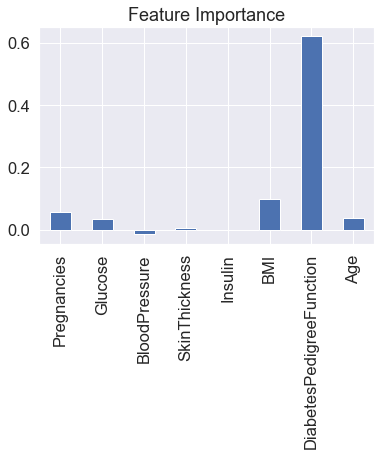

In [71]:
feature_df = pd.DataFrame(feature_importance, index=[0])

# Plot the feature Importance data frame
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [72]:
!git init

Initialized empty Git repository in C:/Users/AC Nice/Documents/DATA SCIENCE PROJECT/main projects/Diabetes prediction exercise/.git/


In [73]:
!git remote add origin https://github.com/anochima/Diabetes-prediction.git